## Diagnostic of EarthCARE data of TCs

In [1]:
# General
import os
import glob

# Display
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm

# Data treatment
import xarray as xr
import numpy as np
# from scipy.interpolate import griddata
import pandas as pd 
from tqdm.notebook import tqdm
import ephem
import seaborn as sns
import re
from datetime import datetime
from pyproj import CRS, Geod

# Custom
import sys
sys.path.append('../ectools')
from ectools import ecio
from ectools import ecplot as ecplt
from ectools import colormaps

# Default parameters
fontsize = 16
mpl.rcParams.update({'font.size': fontsize})
mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
PTHS = {
    'sar_pth': '/home/arthur/results/sar_extended/05_addPRIMED/dsg.nc',
    'ear_dir': '/home/arthur/results/TCsLifeMonitFromObs/PRJCT_VERTICAL_WIND/01_COLLOCATE_EARTHCARE_TCs/AC__TC__2B/',
    'sav_dir': '/home/arthur/results/TCsLifeMonitFromObs/PRJCT_VERTICAL_WIND/02_EARTHCARE_DIAGNOSTIC/'
}

# Open SAR
dsg      = xr.open_dataset(PTHS['sar_pth'])

# Open EarthCARE
all_data = glob.glob(PTHS['ear_dir'] + '*.nc')

In [3]:
ACTC_category_colors = [sns.xkcd_rgb['silver'],         #unknown
                        sns.xkcd_rgb['reddish brown'],         #surface and subsurface
                        sns.xkcd_rgb['white'],         #clear
                        sns.xkcd_rgb['dull red'],      #rain in clutter
                        sns.xkcd_rgb['off blue'],     #snow in clutter
                        sns.xkcd_rgb['dull yellow'],   #cloud in clutter
                        sns.xkcd_rgb['dark red'],      #heavy rain',
                        sns.xkcd_rgb["navy blue"],   #heavy mixed-phase precipitation
                        sns.xkcd_rgb['light grey'],    #clear (poss. liquid) 
                        sns.xkcd_rgb['pale yellow'],   #liquid cloud
                        sns.xkcd_rgb['golden'],        #drizzling liquid
                        sns.xkcd_rgb['orange'],        #warm rain
                        sns.xkcd_rgb['bright red'],    #cold rain
                        sns.xkcd_rgb['easter purple'], # melting snow
                        sns.xkcd_rgb['dark sky blue'],        # snow (possible liquid)
                        sns.xkcd_rgb['bright blue'], # snow
                        sns.xkcd_rgb["prussian blue"],   # rimed snow (poss. liquid)
                        sns.xkcd_rgb['dark teal'],   # rimed snow and SLW
                        sns.xkcd_rgb['teal'],              # snow and SLW
                        sns.xkcd_rgb['light green'],   # supercooled liquid
                        sns.xkcd_rgb["sky blue"],      # ice (poss. liquid)
                        sns.xkcd_rgb['bright teal'],   # ice and SLW
                        sns.xkcd_rgb['light blue'],    # ice (no liquid)
                        sns.xkcd_rgb['pale blue'],     # strat. ice, PSC II
                        sns.xkcd_rgb['neon green'],    # PSC Ia
                        sns.xkcd_rgb['greenish cyan'], # PSC Ib
                        sns.xkcd_rgb['ugly green'],    # insects
                        sns.xkcd_rgb['sand'],          # dust
                        sns.xkcd_rgb['pastel pink'],   # sea salt
                        sns.xkcd_rgb['dust'],          # continental pollution
                        sns.xkcd_rgb['purpley grey'],  # smoke
                        sns.xkcd_rgb['dark lavender'], # dusty smoke
                        sns.xkcd_rgb['dusty lavender'],# dusty mix
                        sns.xkcd_rgb['pinkish grey'],  # stratospheric aerosol 1 (ash)
                        sns.xkcd_rgb['light khaki'],       # stratospheric aerosol 2 (sulphate)
                        sns.xkcd_rgb['light grey'],    # stratospheric aerosol 3 (smoke)]
                  ]

hmax = 20000

In [4]:
MIN_DIS2CEN        = []
MIN_DIS2CEN_STRONG = []

for file in tqdm(all_data):
    ds = xr.open_dataset(file)

    if ds.closest_distance_to_track_center_ibt < 5000:
        print(ds.vmx_ibt.values)
        print(ds.file.item())
        print(file)

    if ds.vmx_ibt >= 33:
        MIN_DIS2CEN_STRONG.append(float(ds.closest_distance_to_track_center_ibt))
    
    MIN_DIS2CEN.append(float(ds.closest_distance_to_track_center_ibt))

  0%|          | 0/283 [00:00<?, ?it/s]

15.432000160217285
/home/arthur/data/earthCARE/full_datasets/AC__TC__2B/2024/09/30/ECA_EXAA_AC__TC__2B_20240930T172759Z_20241001T132734Z_01941E.h5
/home/arthur/results/TCsLifeMonitFromObs/PRJCT_VERTICAL_WIND/01_COLLOCATE_EARTHCARE_TCs/AC__TC__2B/ECA_EXAA_AC__TC__2B_20240930T172759Z_20241001T132734Z_01941E.nc
10.288000106811523
/home/arthur/data/earthCARE/full_datasets/AC__TC__2B/2024/07/29/ECA_EXAA_AC__TC__2B_20240729T220910Z_20240730T145828Z_00964E.h5
/home/arthur/results/TCsLifeMonitFromObs/PRJCT_VERTICAL_WIND/01_COLLOCATE_EARTHCARE_TCs/AC__TC__2B/ECA_EXAA_AC__TC__2B_20240729T220910Z_20240730T145828Z_00964E.nc
32.66655269007365
/home/arthur/data/earthCARE/full_datasets/AC__TC__2B/2024/10/28/ECA_EXAA_AC__TC__2B_20241028T170932Z_20241028T230948Z_02377A.h5
/home/arthur/results/TCsLifeMonitFromObs/PRJCT_VERTICAL_WIND/01_COLLOCATE_EARTHCARE_TCs/AC__TC__2B/ECA_EXAA_AC__TC__2B_20241028T170932Z_20241028T230948Z_02377A.nc
15.432000160217285
/home/arthur/data/earthCARE/full_datasets/AC__TC__2B

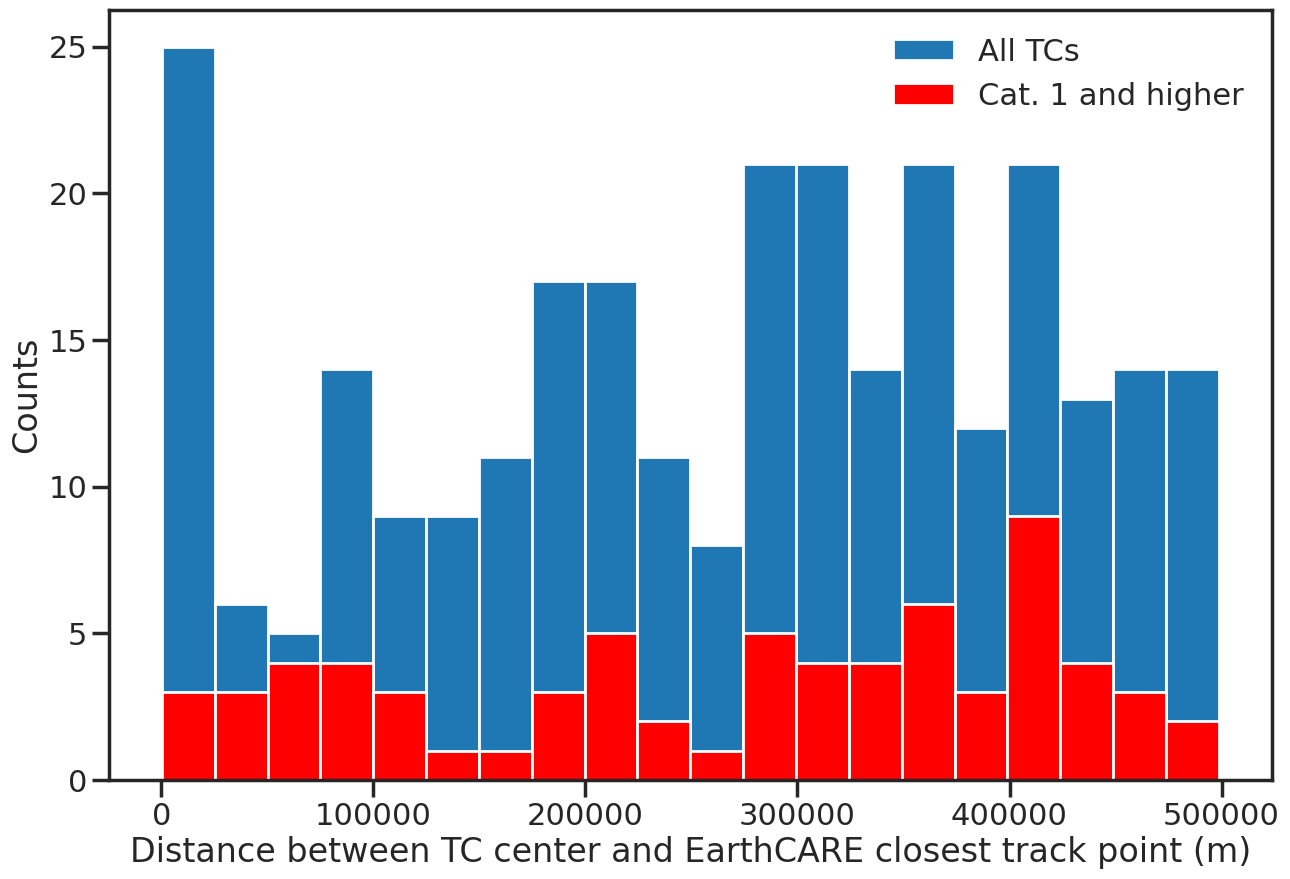

In [5]:
_, bins, _,  = plt.hist(MIN_DIS2CEN, bins=20, label='All TCs')
plt.hist(MIN_DIS2CEN_STRONG, bins=bins, color='red', label='Cat. 1 and higher')

plt.xlabel('Distance between TC center and EarthCARE closest track point (m)')
plt.ylabel('Counts')
plt.legend(frameon=False)

# plt.savefig(PTHS['sav_dir'] + 'Histogram_EarthCARE_data_on_TCs.png', bbox_inches='tight')

In [6]:
p      = '/home/arthur/results/TCsLifeMonitFromObs/PRJCT_VERTICAL_WIND/01_COLLOCATE_EARTHCARE_TCs/AC__TC__2B/ECA_EXAA_AC__TC__2B_20241010T050822Z_20241010T104634Z_02089B.nc'
leslie = xr.open_dataset(p)
print(leslie.closest_distance_to_track_center_ibt.values)

32699.17102005767


In [7]:
for file in tqdm(all_data):
    ds = xr.open_dataset(file)

    if (ds.vmx_ibt >= 33) & (ds.closest_distance_to_track_center_ibt <= 50000):
        # Display
        print(ds.vmx_ibt.values)
        print(ds.file.item())
        print(file)
        print(float(ds.lat_ibt), float(ds.lon_ibt))
        print(ds.atcf_id_ibt.item())
        print(ds.time.mean().data)
        print('Vmax = {:.1f} m/s'.format(ds.vmx_ibt))
        print('Rmax = {:.1f} km '.format(ds.rmx_ibt / 1000))

        # Latitudes are not necessarily ordererd from South to North
        # This may cause a trimming error when choosing lat_boundaries
        dx = 10
        if ds.latitude[1] - ds.latitude[0] > 0: # satellite goes from South to North
            lat_boundaries = [float(ds.lat_ibt) - dx, float(ds.lat_ibt) + dx]
        else:
            lat_boundaries = [float(ds.lat_ibt) + dx, float(ds.lat_ibt) - dx]

        # Load
        ACTC = ecio.load_ACTC(
            ds.file.item(),
            trim={'latitude': slice(lat_boundaries[0], lat_boundaries[1])}
        )

        # Plot
        fig, ax  = plt.subplots(figsize=(20, 10))
        title    = '{}, Lat = {:.1f}°N, Lon = {:.1f}°E, {:.1f} km far from sat closest point, Vmax = {:.1f} m/s, Rmax = {:.1f} km'.format(ds.atcf_id_ibt.item(), ds.lat_ibt, ds.lon_ibt, ds.closest_distance_to_track_center_ibt / 1000, ds.vmx_ibt, ds.rmx_ibt / 1000)
        fig.suptitle(title, y=1.05, weight='bold')
        ecplt.plot_EC_target_classification(ax, ACTC, 'synergetic_target_classification_low_resolution', ACTC_category_colors, title_prefix="", label_fontsize=10, hmax=hmax)

        # Save
        # plt.savefig(PTHS['sav_dir'] + os.path.basename(file)[:-3] + '.png', bbox_inches='tight');plt.clf()
        
        plt.show()

  0%|          | 0/283 [00:00<?, ?it/s]

45.648574080668325
/home/arthur/data/earthCARE/full_datasets/AC__TC__2B/2024/11/18/ECA_EXAA_AC__TC__2B_20241118T090328Z_20241118T103642Z_02698E.h5
/home/arthur/results/TCsLifeMonitFromObs/PRJCT_VERTICAL_WIND/01_COLLOCATE_EARTHCARE_TCs/AC__TC__2B/ECA_EXAA_AC__TC__2B_20241118T090328Z_20241118T103642Z_02698E.nc
-17.5 69.18965286470745
SH022025
2024-11-18T09:09:18.589074204
Vmax = 45.6 m/s
Rmax = 28.0 km 
Trimming by latitude
46.29600143432617
/home/arthur/data/earthCARE/full_datasets/AC__TC__2B/2024/10/10/ECA_EXAA_AC__TC__2B_20241010T045647Z_20241010T104700Z_02089A.h5
/home/arthur/results/TCsLifeMonitFromObs/PRJCT_VERTICAL_WIND/01_COLLOCATE_EARTHCARE_TCs/AC__TC__2B/ECA_EXAA_AC__TC__2B_20241010T045647Z_20241010T104700Z_02089A.nc
22.56809748665187 -49.50429039816463
AL132024
2024-10-10T05:02:34.500543145
Vmax = 46.3 m/s
Rmax = 18.5 km 
Trimming by latitude
54.23535507814613
/home/arthur/data/earthCARE/full_datasets/AC__TC__2B/2024/11/17/ECA_EXAA_AC__TC__2B_20241117T212924Z_20241117T225131Z_

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [13]:
# p  = '/home/arthur/results/TCsLifeMonitFromObs/PRJCT_VERTICAL_WIND/01_COLLOCATE_EARTHCARE_TCs/AC__TC__2B/ECA_EXAA_AC__TC__2B_20250112T105253Z_20250112T123739Z_03555E.nc'
# ds = xr.open_dataset(p)

In [12]:
# # Display
# print(ds.vmx_ibt.values)
# print(ds.file.item())
# print(file)
# print(float(ds.lat_ibt), float(ds.lon_ibt))
# print(ds.atcf_id_ibt.item())
# print(ds.time.mean().data)
# print('Vmax = {:.1f} m/s'.format(ds.vmx_ibt))
# print('Rmax = {:.1f} km '.format(ds.rmx_ibt / 1000))

# # Latitudes are not necessarily ordererd from South to North
# # This may cause a trimming error when choosing lat_boundaries
# dx = 10
# if ds.latitude[1] - ds.latitude[0] > 0: # satellite goes from South to North
#     lat_boundaries = [float(ds.lat_ibt) - dx, float(ds.lat_ibt) + dx]
# else:
#     lat_boundaries = [float(ds.lat_ibt) + dx, float(ds.lat_ibt) - dx]

# # Load
# ACTC = ecio.load_ACTC(
#     ds.file.item(),
#     trim={'latitude': slice(lat_boundaries[0], lat_boundaries[1])}
# )

# # Plot
# fig, ax  = plt.subplots(figsize=(20, 10))
# title    = '{}, Lat = {:.1f}°N, Lon = {:.1f}°E, {:.1f} km far from sat closest point, Vmax = {:.1f} m/s, Rmax = {:.1f} km'.format(ds.atcf_id_ibt.item(), ds.lat_ibt, ds.lon_ibt, ds.closest_distance_to_track_center_ibt / 1000, ds.vmx_ibt, ds.rmx_ibt / 1000)
# fig.suptitle(title, y=1.05, weight='bold')
# ecplt.plot_EC_target_classification(ax, ACTC, 'synergetic_target_classification_low_resolution', ACTC_category_colors, title_prefix="", label_fontsize=10, hmax=hmax)

In [7]:
d = xr.open_dataset('/home/arthur/results/TCsLifeMonitFromObs/PRJCT_VERTICAL_WIND/01_COLLOCATE_EARTHCARE_TCs/AC__TC__2B/ECA_EXAA_AC__TC__2B_20241028T170932Z_20241028T230948Z_02377A.nc')
print(float(d.lat_ibt), float(d.lon_ibt))
print(d.atcf_id_ibt.item())
print(d.time.mean().data)
print('Rmax = {:.1f} km'.format(d.rmx_ibt / 1000))
lat_boundaries = [2.5, 22.5]

ACTC = ecio.load_ACTC(
    '/home/arthur/data/earthCARE/full_datasets/AC__TC__2B/2024/10/28/ECA_EXAA_AC__TC__2B_20241028T170932Z_20241028T230948Z_02377A.h5',
    trim={'latitude': slice(lat_boundaries[0], lat_boundaries[1])}
)

17.125628177719555 127.97437269255973
WP232024
2024-10-28T17:15:22.597185501
Rmax = 49.1 km
Trimming by latitude


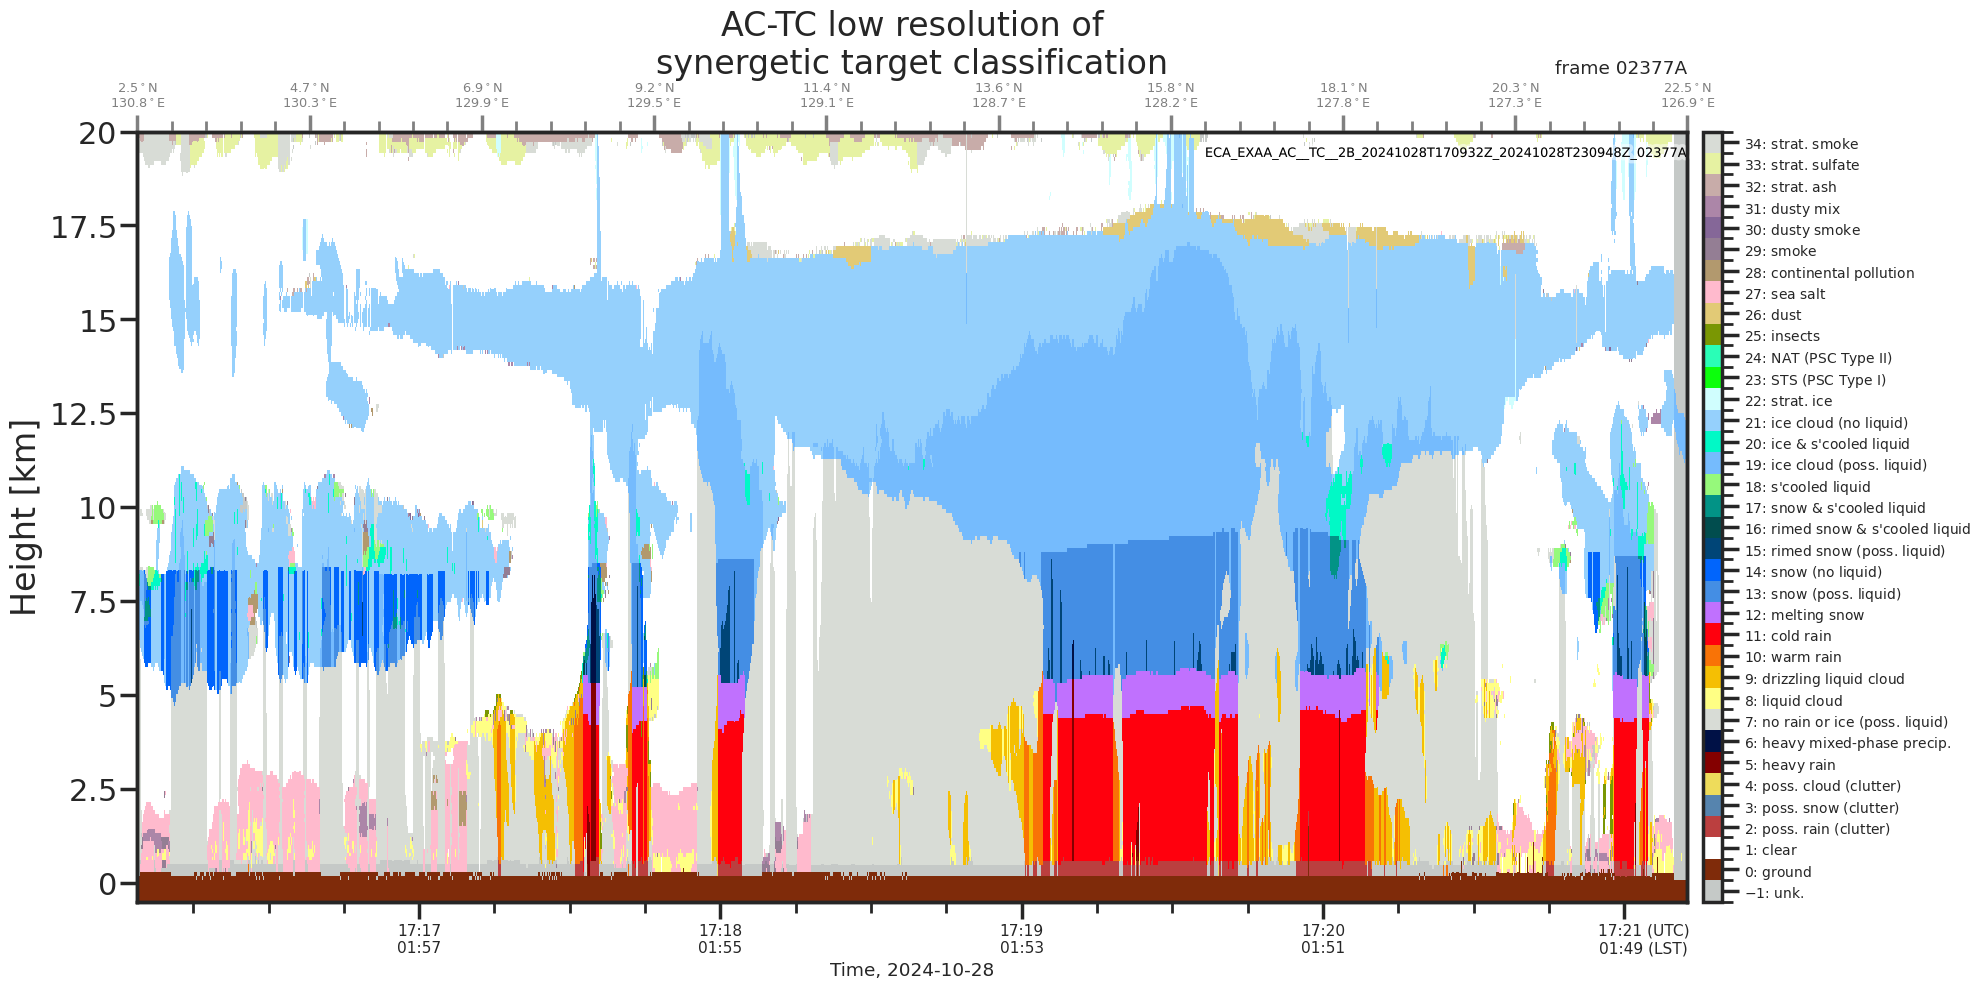

In [8]:
fig, ax  = plt.subplots(figsize=(20, 10))

ecplt.plot_EC_target_classification(ax, ACTC, 'synergetic_target_classification_low_resolution', ACTC_category_colors, title_prefix="", label_fontsize=10, hmax=hmax)

# plt.savefig(PTHS['sav_dir'] + 'Leslie_Classification', bbox_inches='tight')